In [7]:
#獨黨
import numpy as np
x_train = np.loadtxt('x_train.csv', delimiter=',')
x_test = np.loadtxt('X_test.csv', delimiter=',')
y_train= np.loadtxt('y_train.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

(array([ 107.,  134.,  183.,  162.,   85.,    6.,    2.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

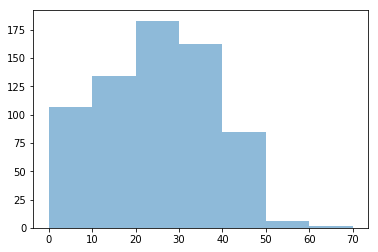

In [20]:
#開始觀察資料決定區間
%matplotlib inline
import matplotlib.pyplot as plt
bins = np.arange(0, 80,10)
plt.hist(y_train, bins = bins, alpha = 0.5)

In [9]:
np.average(y_train)

24.638235294117646

In [10]:
np.std(y_train)

13.211570568475693

In [14]:
len(x_train)

680

In [15]:
#轉變Ｘ的型態
X = np.reshape(x_train,(len(x_train),15,1))#(x_train的個數, 15, 1)
X_test = np.reshape(x_test,(len(x_test),15,1))#(x_test的個數, 15, 1)

In [16]:
X

array([[[  23.],
        [  12.],
        [   6.],
        ..., 
        [   2.],
        [  11.],
        [   1.]],

       [[  24.],
        [   9.],
        [  18.],
        ..., 
        [   4.],
        [  79.],
        [   5.]],

       [[  25.],
        [ 105.],
        [ 357.],
        ..., 
        [  45.],
        [  71.],
        [ 136.]],

       ..., 
       [[  32.],
        [ 137.],
        [ 536.],
        ..., 
        [ 126.],
        [ 121.],
        [ 223.]],

       [[  33.],
        [ 133.],
        [ 539.],
        ..., 
        [ 117.],
        [ 122.],
        [ 230.]],

       [[  34.],
        [ 103.],
        [ 416.],
        ..., 
        [  87.],
        [  83.],
        [ 146.]]])

In [21]:
#輸出這邊我將資料分成群
y_train[y_train<10] = 0
y_train[(y_train>=10) & (y_train<20)] = 1
y_train[(y_train>=20) & (y_train<30)] = 2
y_train[(y_train>=30) & (y_train<40)] = 3
y_train[(y_train>=40)] = 4

In [22]:
y_test[y_test<10] = 0
y_test[(y_test>=10) & (y_test<20)] = 1
y_test[(y_test>=20) & (y_test<30)] = 2
y_test[(y_test>=30) & (y_test<40)] = 3
y_test[(y_test>=40)] = 4

In [23]:
len(y_train)

680

In [25]:
#將Ｙ轉換型態
from keras.utils import np_utils
y_train_trans = np_utils.to_categorical(y_train,5)
y_test_trans = np_utils.to_categorical(y_test,5)

Using TensorFlow backend.


In [27]:
from keras.models import Sequential
from keras.layers import Dense,Activation, LSTM, Dropout
from keras.optimizers import SGD
model = Sequential()
model.add(LSTM(256, activation="sigmoid", input_shape=(X.shape[1], X.shape[2]), recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(y_train_trans.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 265,477
Trainable params: 265,477
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X, y_train_trans,batch_size=10, epochs=50, validation_data=(X_test, y_test_trans))

Train on 680 samples, validate on 305 samples
Epoch 1/50
680/680 [==============================] - 6s - loss: 1.5841 - acc: 0.2824 - val_loss: 1.5143 - val_acc: 0.2590

In [29]:
score = model.evaluate(X_test, y_test_trans, verbose=0)
score

[1.511188247555592, 0.27868852527415167]

In [30]:
result = model.predict(X_test)

In [33]:
from ipywidgets import interact_manual
def identify(testnumber):
    print("神經網路判斷為：",result[testnumber])
    print("正確答案是:",y_test_trans[testnumber])
interact_manual(identify, testnumber=(0,len(X_test)-1))

神經網路判斷為： [ 0.07571302  0.21898146  0.29961121  0.28118882  0.12450548]
正確答案是: [ 0.  0.  1.  0.  0.]
